# Demo notebook for `richfile`

Welcome to the demo notebook for the `richfile` python package.\
Below you'll find the following chapters:
#### A. Basics of conventions
#### B. Basic examples
#### C. Advanced examples
#### D. Details


What is `richfile`?

- Primarily, it set of **conventions** for saving and loading nested data structures in a human-readable format.
- In practice, it is also a software library / API that implements these conventions.
- The goals of the `richfile` conventions:
    - **Human-readable**: The data saved on disk should be human-readable in a file explorer.
    - **Directory structure**: Hierarchically organized data should be stored in a directory structure.
    - **Versioning**: The data should be insensitive to software version changes. No loss of old data.
    - **Customizable**: The data should be highly customizable.

## A. Basics of `richfile` python conventions
1. richfiles are hierarchically organized directory structures that represent hierarchically organized data structures. (Similar to JSON, HDF5, etc.)
2. Container objects like `list`, `dict`, `set`, `tuple` are represented as directories.
3. Atomic objects like `int`, `float`, arrays, etc. are represented as files.
4. Each directory has a `metadata.richfile` file that contains metadata about the container and its contents. This is a protected filename.
5. Atomic objects are saved and loaded using functions that are specific to that object type. Ideally, these are libraries native to the data type (e.g. `numpy` for arrays). Native python atomic objects like `int`, `str`, etc. are saved as `.json` files.

#### What does a richfile look like?
Here is an example python object:
```python
some_dict = {
    "some_list_of_int": [1, 2, 3],
    "a_nested_dict": {
        "some_float": 4.5,
        "some_str": "hello"
        "another_dict": {
            "f": None,
            "some_tuple_of_numpy_arrays": (np.array(...), np.array(...)),
            "some_set_of_dicts": {{"a": 1}, {"b": 2}},
        }
    }
}
```

And the corresponding `richfile` folder structure:
```
some_dict.richfile (a folder containing the following folder structure)
├── metadata.richfile
├── some_list_of_int.list
|   ├── metadata.richfile
|   ├── 0.int
|   ├── 1.int
|   ├── 2.int
|
├── a_nested_dict.dict
|   ├── metadata.richfile
|   ├── some_float.dict_item
|   |   ├── metadata.richfile
|   |   ├── key.str
|   |   ├── value.float
|   |
|   ├── some_str.dict_item
|   |   ├── metadata.richfile
|   |   ├── key.str
|   |   ├── value.str
|   |
|   ├── another_dict.dict_item
|   |   ├── metadata.richfile
|   |   ├── key.str
|   |   ├── value.dict
|   |   |   ├── metadata.richfile
|   |   |   ├── f.none
|   |   |   ├── some_tuple_of_numpy_arrays.tuple
|   |   |   |   ├── metadata.richfile
|   |   |   |   ├── 0.npy
|   |   |   |   ├── 1.npy
|   |   |   |
|   |   |   ├── some_set_of_dicts.set
|   |   |   |   ├── metadata.richfile
|   |   |   |   ├── 0.dict
|   |   |   |   |   ├── metadata.richfile
|   |   |   |   |   ├── a.dict_item
|   |   |   |   |   |   ├── metadata.richfile
|   |   |   |   |   |   ├── key.str
|   |   |   |   |   |   ├── value.int
|   |   |   |   |   |
|   |   |   |   |
|   |   |   |   ├── 1.dict
|   |   |   |   |   ├── metadata.richfile
|   |   |   |   |   ├── b.dict_item
|   |   |   |   |   |   ├── metadata.richfile
|   |   |   |   |   |   ├── key.str
|   |   |   |   |   |   ├── value.int
|   |   |   |   |   |
|   |   |   |   |
|   |   |   |
|   |   |
|   |
|
```

## B. Basic examples

1. Saving data objects
2. Exploring the saved data
3. Loading the saved data
4. Loading specific elements from the saved data

In [3]:
%load_ext autoreload
%autoreload 2
import richfile as rf

## Set path to save / load a richfile
path = '/home/rich/Desktop/test4/data.richfile'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Make a data object
We will make a nested dictionary object and save it as a `richfile` folder.

In [4]:
import numpy as np

## Save a dictionary to a richfile
data = {
    "name": "John Doe",
    "age": 25,
    "address": {
        "street": "1234 Elm St",
        "zip": None
    },
    "siblings": [
        "Jane",
        "Jim"
    ],
    "data": np.array([1,2,3]),
    (1,2,3): "complex key",
}

### 1. Save the data object

In [6]:
## Save the dictionary to a file
r = rf.RichFile(path=path).save(obj=data, overwrite=True)

### 2. Explore the saved data
The folder was saved as `some_dict.richfile` on disk. We will print out the directory structure below. 

You can also explore the folder in your file explorer BUT DO NOT MODIFY THE FOLDER CONTENTS. You can copy data out of it, but if you modify the names or contents of the files without also updating the metadata, the data will be corrupted.

In [7]:
### Prepare the richfile object
r = rf.RichFile(path=path)

print("Object tree in `richfile` directory")
r.view_tree(show_filenames=True)

print("")
print("Directory structure")
r.view_directory_tree()

Object tree in `richfile` directory
Path: /home/rich/Desktop/test4/data.richfile (dict)
├── 'name': value.json  (str)
├── 'age': value.json  (int)
├── 'address': value.dict  (dict)
|    ├── 'street': value.json  (str)
|    ├── 'zip': value.json  (None)
|    
├── 'siblings': value.list  (list)
|    ├── 0.json  (str)
|    ├── 1.json  (str)
|    
├── 'data': value.npy  (numpy_array)
├── '(1, 2, 3)': value.json  (str)


Directory structure
Viewing tree structure of richfile at path: /home/rich/Desktop/test4/data.richfile (dict)
├── name.dict_item (dict_item)
|   ├── key.json (str)
|   ├── value.json (str)
|   
├── age.dict_item (dict_item)
|   ├── key.json (str)
|   ├── value.json (int)
|   
├── address.dict_item (dict_item)
|   ├── key.json (str)
|   ├── value.dict (dict)
|   |   ├── street.dict_item (dict_item)
|   |   |   ├── key.json (str)
|   |   |   ├── value.json (str)
|   |   |   
|   |   ├── zip.dict_item (dict_item)
|   |   |   ├── key.json (str)
|   |   |   ├── value.json (None)

### 3. Load the saved data
The directory structure of the `some_dict.richfile` directory can be loaded back into a python object.

In [8]:
### Prepare the richfile object
data_2 = rf.RichFile(path=path).load()

## Check if the data is the same
def check_data(d1, d2):
    if isinstance(d1, dict):
        [check_data(d1[k], d2[k]) for k in d1]
    elif isinstance(d1, list):
        [check_data(d1[i], d2[i]) for i in range(len(d1))]
    elif isinstance(d1, np.ndarray):
        assert np.all(d1 == d2)
    else:
        assert d1 == d2
    return True

print(f"Data is the same: {check_data(data, data_2)}")

Data is the same: True


### 4. Load specific elements from the saved data
We can also load specific elements from the directory structure without loading the entire directory. You can index into `RichFile` objects directly like python dictionaries and lists. This will create a new `RichFile` object corresponding to the subdirectory you indexed into.

In [9]:
### Prepare the richfile object
r = rf.RichFile(path=path)

### Lazily load a single element from deep in the dictionary by specifying the path
print(f"Original richfile object:")
r.view_tree()
## Make a new richfile object that points to the 'siblings' list inside the data dictionary
r2 = r['siblings'] 

print(f"\nNew richfile object for the 'siblings' dictionary item:")
r2.view_tree()
## Lazily load the first element of the 'siblings' list
data2 = r2[1].load()

print(f"\nFirst element of the 'siblings' list:")
print(data2)

Original richfile object:
Path: /home/rich/Desktop/test4/data.richfile (dict)
├── 'name':   (str)
├── 'age':   (int)
├── 'address':   (dict)
|    ├── 'street':   (str)
|    ├── 'zip':   (None)
|    
├── 'siblings':   (list)
|    ├──   (str)
|    ├──   (str)
|    
├── 'data':   (numpy_array)
├── '(1, 2, 3)':   (str)


New richfile object for the 'siblings' dictionary item:
Path: /home/rich/Desktop/test4/data.richfile/siblings.dict_item/value.list (list)
├──   (str)
├──   (str)


First element of the 'siblings' list:
Jim


## C. Advanced examples

1. Calling loading and saving functions with custom arguments
2. Custom saving and loading functions for any object type

### 1. Calling loading and saving functions with custom arguments

**Loading**: Let's load a numpy array using memory mapping. This requires passing the `mmap_mode` argument to the inner loading function for `np.ndarray` objects: `np.save`. This is accomplished by calling the `.set_load_kwargs` method on the `RichFile` object before calling the loading function.

In [10]:
### Prepare the richfile object
r = rf.RichFile(path=path)

### Set the `mmap_mode='r'` for loading objects of the `'numpy_array'` or np.ndarray type
r.set_load_kwargs(type_=np.ndarray, mmap_mode='r')

### Load the numpy array as a memory-mapped array
data = r['data'].load()

print(f"Type of the loaded numpy array: {type(data)}")

Type of the loaded numpy array: <class 'numpy.memmap'>


**Saving**: You can do the same thing with saving using the `.set_save_kwargs` method. Remember that all atomic objects should be able to be saved and loaded and saved and loaded again without any loss of information or change in the object.

### 2. Custom saving and loading functions for any object type

You can register any new data type using one of a few options, depending on how permanently you want to add the new type. See below examples for each.
##### **Option A** (recommended): Scope: Temporary, within a single `RichFile` object. Pass the new data type details into the `.register_type` method on a `RichFile` object instance. This is the most flexible option.
##### **Option B** (recommended): Scope: Temporary, within the current python session. Pass the new data type details into the `richfile.functions.register_type` function. If your object is a container-type and you'd like it to save like a dictionary into a folder on disk, use the `richfile.functions.Type_container` class.
##### **Option C**: Scope: Permanent, across python sessions. Add your own saving and loading functions in the `richfile.functions` module. Consider forking this repo and installing with `pip install -e .` to make your changes permanent. If you think what you wrote should be included in the main package, please submit a pull request and we will probably accept it.

---
**Option A example:**

Register a new data type with a `RichFile` object instance:  `RichFile.register_type`.

This will add the new data type to the `RichFile` object instance only. It will not be available in other `RichFile` objects.

For this example we will register the `sparse.COO` class from the `sparse` library. This is a simple array class like numpy arrays, but used for sparse arrays. Let's register it with the `RichFile` object we created earlier so that object instances from this class can be saved and loaded.

You can install the `sparse` library with `pip install sparse`.

In [11]:
## Save a sparse.COO array to a richfile
path_sparse = '/home/rich/Desktop/test4/data_sparse.richfile'


## CODE FOR NEW TYPE: sparse.COO

### Make an object with a new object class: sparse.COO
import sparse

data_sparse = {
    "some_sparse_data": sparse.COO(np.random.randint(0, 10, (100, 100))),
}

### Make save / load functions for objects of the type: sparse.COO
def load_sparseCOO_array(path, **kwargs):
    import sparse
    return sparse.load_npz(path)
def save_sparseCOO_array(obj, path, **kwargs):
    import sparse
    sparse.save_npz(path, obj)

### Initialize a new RichFile object
r = rf.RichFile(path=path_sparse)
### Define the new type for the sparse.COO array
### NOTE: all of these fields are required
r.register_type(
    type_name="sparseCOO_array",         ## Name of the new type
    function_load=load_sparseCOO_array,  ## Load function for all objects of this class
    function_save=save_sparseCOO_array,  ## Save function for all objects of this class
    object_class=sparse.COO,              ## Class type
    suffix="npz",                        ## File extension
    library="sparse",                    ## Library name
)

### Save the sparse.COO array to a richfile
r.save(obj=data_sparse, overwrite=True)

### Load the sparse.COO array from the richfile
data_sparse2 = r.load()

### Check for equality
assert np.allclose(data_sparse['some_sparse_data'].todense(), data_sparse2['some_sparse_data'].todense())

**Option B examples:**

Example B1: first example for Option B is a simple one: Add the new **data** type using `richfile.functions.CustomObject`. In the next case, we will add a new **container** type.

This will add the data type for the current python session only. The new type will be available to all `RichFile` objects subsequently created in this session.

<class 'PIL.Image.Image'>


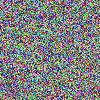

In [12]:
## Make an object with a new object class: PIL.Image.Image
import PIL.Image

data_image = {
    "some_image_rgb": PIL.Image.fromarray(np.random.randint(0, 255, (100, 100, 3)).astype(np.uint8)),
    "some_image_gray": PIL.Image.fromarray(np.random.randint(0, 255, (100, 100)).astype(np.uint8)),
}

## Note the new type of the objects
print(type(data_image['some_image_rgb']))

## Look at an image:
data_image['some_image_rgb']

In [13]:
## Note that there is no type available with 'type_name'='PIL_image' or with 'object_class'=PIL.Image.Image
print(f"type_name: 'PIL_image' in _TYPE_LOOKUP: {any([t['type_name']=='PIL_image' for t in rf.functions._TYPE_LOOKUP])}")
print(f"object_class: PIL.Image.Image in _TYPE_LOOKUP: {any([t['object_class']==PIL.Image.Image for t in rf.functions._TYPE_LOOKUP])}")
print('')

## Make loading and saving functions for the PIL.Image.Image objects
def load_PIL_imag_png(path, **kwargs):
    import PIL.Image
    return PIL.Image.open(path)
def save_PIL_imag_png(obj, path, **kwargs):
    with open(path, 'wb') as f:
        obj.save(f, format='PNG')

## Make a custom object class that we want to be able to save / load
rf.functions.register_type(
    type_name="PIL_image",
    function_load=load_PIL_imag_png,
    function_save=save_PIL_imag_png,
    object_class=PIL.Image.Image,
    suffix="png",
    library="PIL",
    versions_supported=[">6", "<12"],
)

## Now see that the new type is available
print(f"type_name: 'PIL_image' in _TYPE_LOOKUP: {any([t['type_name']=='PIL_image' for t in rf.functions._TYPE_LOOKUP])}")
print(f"object_class: PIL.Image.Image in _TYPE_LOOKUP: {any([t['object_class']==PIL.Image.Image for t in rf.functions._TYPE_LOOKUP])}")

type_name: 'PIL_image' in _TYPE_LOOKUP: False
object_class: PIL.Image.Image in _TYPE_LOOKUP: False

type_name: 'PIL_image' in _TYPE_LOOKUP: True
object_class: PIL.Image.Image in _TYPE_LOOKUP: True


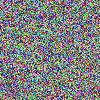

In [14]:
## Now save the image to a richfile
path_image = '/home/rich/Desktop/test4/data_image.richfile'

## Initialize a new RichFile object and save the image
r = rf.RichFile(path=path_image).save(obj=data_image, overwrite=True)

## Load the image from the richfile
data_image2 = rf.RichFile(path=path_image).load()

## Check for equality
assert np.allclose(np.array(data_image['some_image_rgb']), np.array(data_image2['some_image_rgb']))

## Look at the image
data_image2['some_image_rgb']

Example B2: Custom container type classes. You can use the `richfile.functions.Type_container` class to register a new container type. This will save the object as a directory on disk, with each item in the container saved as a separate file / folder.

For this example, we will make a custom class that holders some data.

In [15]:
path_new_class = '/home/rich/Desktop/test4/data_new_class.richfile'

## Prepare a new richfile object
r = rf.RichFile(path=path_new_class)

class NewClass:
    def __init__(self, data, more_data, even_more_data):
        self.data = data
        self.more_data = more_data
        self.even_more_data = even_more_data
    def show_data(self):
        print(self.data)

## Make an object with a new object class: DataClass
d = NewClass(data=5, more_data='hello', even_more_data={'a': 1, 'b': 2})

## Make and register the new type for the DataClass objects
data_type = rf.functions.Type_container(
    type_name="new_class",
    object_class=NewClass,
    suffix="new_class",
    library="python",
    versions_supported=[],
)

## Register the new type just for this richfile object
r.register_type_from_dict(data_type.get_property_dict())
## or globally
# data_type.register_type()


## Save the new_class object to a richfile
r.save(obj=d, overwrite=True)

## Load the new_class object from the richfile
r2 = rf.RichFile(path=path_new_class)
### You MUST register the new type before loading the object if you did not register it globally
r2.register_type_from_dict(data_type.get_property_dict())
d2 = r2.load()

## Check for equality
assert d.data == d2.data
assert d.more_data == d2.more_data
assert d.even_more_data == d2.even_more_data

In [16]:
## We could also register the new type globally
### Check if it is there already
print(f"type_name: 'new_class' in _TYPE_LOOKUP: {any([t['type_name']=='new_class' for t in rf.functions._TYPE_LOOKUP])}")
data_type.register_type()
### Check if it is there now
print(f"type_name: 'new_class' in _TYPE_LOOKUP: {any([t['type_name']=='new_class' for t in rf.functions._TYPE_LOOKUP])}")

## We can now save and load the object without registering the type first
path_new_class2 = '/home/rich/Desktop/test4/data_new_class2.richfile'
rf.RichFile(path=path_new_class2).save(obj=d, overwrite=True)
d3 = rf.RichFile(path=path_new_class2).load()

## Check for equality
assert d.data == d3.data
assert d.more_data == d3.more_data
assert d.even_more_data == d3.even_more_data

type_name: 'new_class' in _TYPE_LOOKUP: False
type_name: 'new_class' in _TYPE_LOOKUP: True


##### **Option C:**

See the the functions at the bottom of `richfile.functions.py` for examples of how to add new data types to the `richfile` package permanently.

## D: Details
DETAILED PYTHON CONVENTIONS FOR NERDS:

The system is based on the following principles: 
- Each leaf object is saved as a separate file 
- The folder structure mirrors the nested object structure:
    - Lists, tuples, and sets are saved as folders with elements saved as files
      or folders with integer names
    - Dicts are saved as folders with items saved as folders with integer names.
      Dict items are saved as folders containing 2 elements.
- There is a single metadata file for each folder describing the properties of
  each element in the folder
    - The metadata file is a JSON file named "metadata.richfile" and contains
      the following items:
        - "elements": a dictionary with keys that are the names of the files /
          folders in the directory and values that are dictionaries with the
          following items:
            - "type": A string describing type of the element. The string used
              should be a valid richfile type, as it is determines how the
              element is loaded. Examples: "npy_array", "scipy_sparse_array",
              "list", "object", "float", etc.
            - "library": A string describing the library used to save the
              element. Examples: "numpy", "scipy", "python", "json" (for native
              python types), etc.
           - "version": A string describing the version of the library used to
              save the element. This is used to determine how the element is
              loaded. Examples: "1.0.0", "0.1.0", etc.
            - "index": An integer that is used to determine the order of the
              elements when loading them. Example: 0, 1, 2, etc.
        - "type": A string describing the type of the folder. The string used
          should be a valid richfile type, as it determines how the folder is
          loaded. Examples: "list", "dict", "tuple", etc. (Only container-like
          types)
        - "library": A string describing the library used to save the folder.
          Examples: "python"
        - "version": A string describing the version of the library used to for
          the container. This is used to determine how the folder is loaded.
          Examples: "3.12", "3.13", etc.
        - "version_richfile": A string describing the version of the richfile
          format used to save the metadata file. Examples: "1.0.0", "0.1.0",
          etc.
- Loading proceeds as follows:
    - enter outer folder
    - load metadata file
    - check that files / folders in the directory match the metadata
    - if folder represents a list, tuple, or set:
        - elements are expected to be named as integers with an appropriate
          suffix: 0.list, 1.npy, 2.dict, 3.npz, 4.json, etc.
        - load each element in the order specified by the metadata index
        - if an element is container-like, enter its folder, load, and package
          it.
    - if folder represents a dict:
        - each item will be saved as a folder containing a single dict item
        - each dict item folder will contain 2 elements: key (0) and value (1)
    - load elements:
        - richfile types (eg. "array", "sparse_array", etc.) are saved and
          loaded using numpy, scipy, etc. as appropriate.
        - an appropriate suffix will be added to the file or folder name.
        - native python types (eg. "float", "int", "str", etc.) are saved as
          JSON files and loaded using the json library.